# Dealing Cards

Source
https://artofproblemsolving.com/wiki/index.php/2023_AMC_8_Problems/Problem_21

## Problem

Alice writes the numbers $1, 2, \dots , 3\times N$ on separate cards, one number per card. She then wishes to divide the cards into $3$ groups of $N$ cards so that the sum of the numbers in each group will be the same. 

**Q1:**
If $N=3$, and Alice allocates the cards into groups at random then what is the probability that the sum of numbers in each group will be the same?

**Q2:**
If $N=3$, and Alice allocates the cards into groups at random then what is the probability that at least one group has the correct total (i.e.,  one third of the sum of all of the numbers)?

**Q3:**
How does the probability that at least one group has the correct total change as $N$ increases?

## Solution

In [121]:
import numpy as np
rng = np.random.default_rng()

import matplotlib.pyplot as plt
 

### Development

* To randomly put cards into 3 groups, shuffle the array and `.reshape`.
* Expect probability for Q1 to be much smaller than for Q2. Why?
* Expect probability for Q3 to go to zero as $N$ increases. Why?

In [122]:
cards = np.arange(1, 13)
cards

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [123]:
rng.shuffle(cards)
cards

array([12,  3,  1, 11,  2,  9,  7,  6,  8, 10,  5,  4])

In [124]:
groups = cards.reshape(3,-1)
groups

array([[12,  3,  1, 11],
       [ 2,  9,  7,  6],
       [ 8, 10,  5,  4]])

In [125]:
totals = groups.sum(axis=1)
totals

array([27, 24, 27])

In [126]:
target = groups.sum() // 3
target

26

In [74]:
matches = totals==target
matches

array([False, False, False])

In [75]:
all(matches)

False

### Q1

In [97]:
def simulate(debug=False):
    rng.shuffle(cards)
    groups = cards.reshape(3,-1)
    totals = groups.sum(axis=1)
    target = groups.sum() // 3
    matches = totals==target

    if debug:
        print("groups:")
        for group,total,match in zip(groups, totals, matches):
            print("\t",group, total,match)

    return all(matches)

simulate(debug=True)

groups:
	 [ 1 12  5 11] 29 False
	 [ 2  4 10  3] 19 False
	 [6 9 8 7] 30 False


False

In [98]:
def run_trials(n, debug=False):
    trials = [simulate(debug=debug) for i in range(n)]
    if debug:
        print(trials)
    return sum(trials) / n

run_trials(2, debug=True)

groups:
	 [1 7 2 6] 16 False
	 [10  3  9 12] 34 False
	 [ 4  5 11  8] 28 False
groups:
	 [11  7 12  2] 32 False
	 [ 8  1 10  4] 23 False
	 [3 5 6 9] 23 False
[False, False]


0.0

In [99]:
print(f"{'n':>10s} {'Pr()':8}\n" + "-"*20)
for k in range(1,7):
    print(f"{10**k:10,} {run_trials(10**k)}")

         n Pr()    
--------------------
        10 0.0
       100 0.01
     1,000 0.002
    10,000 0.0044
   100,000 0.00562
 1,000,000 0.00542


### Q2

In [100]:
def simulate(debug=False):
    rng.shuffle(cards)
    groups = cards.reshape(3,-1)
    totals = groups.sum(axis=1)
    target = groups.sum() // 3
    matches = totals==target

    if debug:
        print("groups:")
        for group,total,match in zip(groups, totals, matches):
            print("\t",group, total,match)

    return any(matches)

simulate(debug=True)

groups:
	 [12  8 10  5] 35 False
	 [ 7 11  4  2] 24 False
	 [6 1 9 3] 19 False


False

In [101]:
def run_trials(n, debug=False):
    trials = [simulate(debug=debug) for i in range(n)]
    if debug:
        print(trials)
    return sum(trials) / n

run_trials(2, debug=0)

0.5

In [102]:
print(f"{'n':>10s} {'Pr()':8}\n" + "-"*20)
for k in range(1,7):
    print(f"{10**k:10,} {run_trials(10**k)}")

         n Pr()    
--------------------
        10 0.2
       100 0.2
     1,000 0.171
    10,000 0.1814
   100,000 0.18724
 1,000,000 0.189134


### Q3

In [104]:
def simulate(cards, debug=False):
    rng.shuffle(cards)
    groups = cards.reshape(3,-1)

    totals = groups.sum(axis=1)  
    target = groups.sum() // 3
    matches = totals==target

    if debug:
        print("groups:")
        for group,total,match in zip(groups, totals, matches):
            print("\t",group, total,match)

    return any(matches)

simulate(np.array([1,2,3,4,5,6,7,8,9,10,11,12]), debug=True)

groups:
	 [ 9 11  7  5] 32 False
	 [8 6 2 1] 17 False
	 [ 4 12 10  3] 29 False


False

In [106]:
def run_trials(N, n=10**5, debug=False):
    cards = np.arange(1, 3*N+1)
    if debug:
        print(f"cards:\n\t{cards}")
    return sum([simulate(cards, debug=debug) for i in range(n)]) / n

run_trials(2, n=3, debug=True)

cards:
	[1 2 3 4 5 6]
groups:
	 [3 5] 8 False
	 [4 1] 5 False
	 [2 6] 8 False
groups:
	 [5 6] 11 False
	 [3 4] 7 True
	 [1 2] 3 False
groups:
	 [3 6] 9 False
	 [2 5] 7 True
	 [4 1] 5 False


0.0

In [112]:
# special case 
# we know if N=1, then the probability is 0
run_trials(N=1)

0.0

In [118]:
N_values = np.arange(2,10)

pr_values = [run_trials(N,n=10**6) for N in N_values]


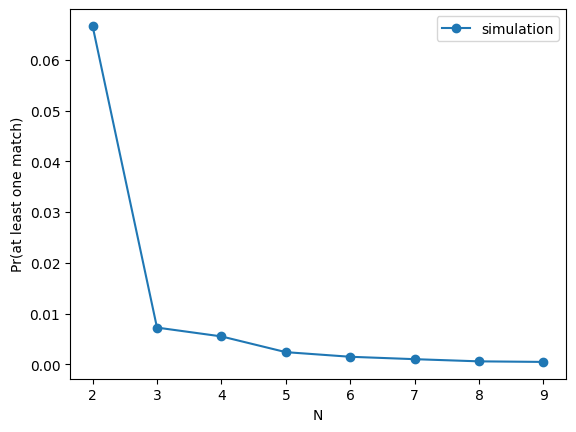

In [128]:
plt.plot(N_values, pr_values, 'o-', label='simulation')
plt.legend()
plt.xlabel('N')
plt.ylabel('Pr(at least one match)')
plt.show()

In [129]:
pr_values

[0.066673,
 0.007253,
 0.005515,
 0.002415,
 0.001504,
 0.001031,
 0.000602,
 0.000489]